In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option("max_columns", None)
%matplotlib inline 
%config InlineBackend.figure_format = 'png'

In [41]:
listings = pd.read_csv("../input/listings.csv")

First we're going to need to fix up the price variable, which is given to us as a string containing dollar signs, dots, and commas, very not ideal.

In [42]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [43]:
listings.tail()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,NaN,NaN,NaN,NaN,1. No damage to the house or furniture 2. No S...,https://a2.muscache.com/im/pictures/809e828a-c...,https://a2.muscache.com/im/pictures/809e828a-c...,https://a2.muscache.com/im/pictures/809e828a-c...,https://a2.muscache.com/im/pictures/809e828a-c...,19246369,https://www.airbnb.com/users/show/19246369,Joe,2014-07-31,"Somerville, Massachusetts, United States",NaN,within an hour,96%,100%,f,https://a2.muscache.com/im/users/19246369/prof...,https://a2.muscache.com/im/users/19246369/prof...,Somerville,28,28,"['email', 'phone', 'reviews', 'jumio']",t,t,"Washington Street, Somerville, MA 02143, Unite...",Somerville,Charlestown,NaN,Somerville,MA,02143,Boston,"Somerville, MA",US,United States,42.380968,-71.083795,t,Apartment,Private room,3,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,$69.00,NaN,NaN,$95.00,NaN,1,$24.00,2,1125,5 days ago,NaN,21,51,81,356,2016-09-06,4,2015-09-18,2016-08-27,90.0,10.0,10.0,10.0,10.0,8.0,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,NaN,"There is green line, BU shuttle in front of th...",NaN,NaN,NaN,https://a2.muscache.com/im/pictures/e833ccdc-6...,https://a2.muscache.com/im/pictures/e833ccdc-6...,https://a2.muscache.com/im/pictures/e833ccdc-6...,https://a2.muscache.com/im/pictures/e833ccdc-6...,37366454,https://www.airbnb.com/users/show/37366454,Ivy,2015-07-02,US,this is Ivy,a few days or more,10%,83%,f,https://a2.muscache.com/im/pictures/685b7a0d-8...,https://a2.muscache.com/im/pictures/685b7a0d-8...,NaN,2,2,"['email', 'phone', 'reviews', 'weibo', 'jumio']",t,t,"Freeman Street, Brookline, MA 02446, United St...",NaN,Allston,NaN,Brookline,MA,02446,Boston,"Brookline, MA",US,United States,42.347503,-71.118336,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$150.00,NaN,NaN,$100.00,$15.00,1,$0.00,3,365,never,NaN,29,59,89,364,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space 

In [44]:
listings['price'].head()

0    $250.00
1     $65.00
2     $65.00
3     $75.00
4     $79.00
Name: price, dtype: object

In [45]:
prices = listings['price'].map(lambda p: int(p[1:-3].replace(",", "")))
#lambda作为一个表达式，定义了一个匿名函数

With that done let's look at the distribution of prices in general.

In [46]:
prices.describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [47]:
listings['price'].head()

0    $250.00
1     $65.00
2     $65.00
3     $75.00
4     $79.00
Name: price, dtype: object

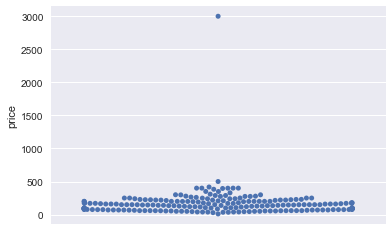

In [48]:
pic = sns.swarmplot(y=prices.sample(200))
pic

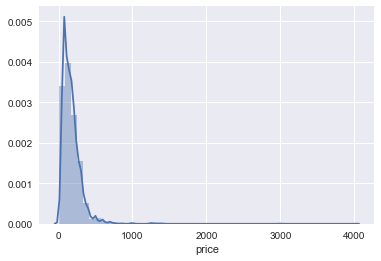

In [49]:
sns.distplot(prices)

Here's that 4000$/night AirBnB, the most expensive one in Boston:

In [50]:
listings.iloc[np.argmax(prices)]

id                                                                           12972378
listing_url                                     https://www.airbnb.com/rooms/12972378
scrape_id                                                              20160906204935
last_scraped                                                               2016-09-07
name                                                  Fenway Park/Kenmore Square Flat
summary                             Central Heat/AC, cable/internet, electricity, ...
space                                  Practicality, functionality, location, comfort
description                         Central Heat/AC, cable/internet, electricity, ...
experiences_offered                                                              none
neighborhood_overview               Kenmore Square/Fenway Park, Boston, Massachusetts
notes                               Super Strict 30 Days: 50% refund up until 30 d...
transit                                 Kenmore Square

In [51]:
listings['price'] = prices

Exploring Variables


Now let's examine the effects of the various variables we have access to on price.

In [52]:
import matplotlib.pyplot as plt

First an obvious one, neighborhood.

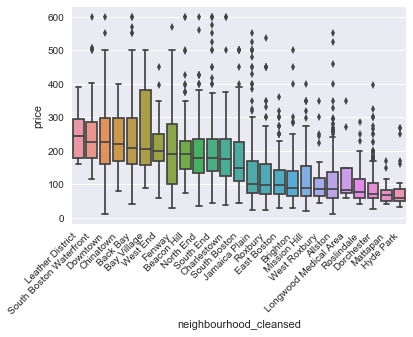

In [55]:
sort_order = listings.query('price <= 600')\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=listings.query('price <= 600'), 
            order=sort_order)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

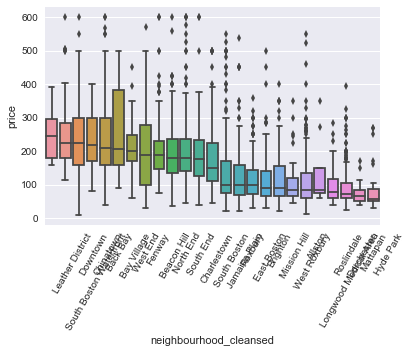

In [57]:
sort_order = listings.query('price <= 600')\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=listings.query('price <= 600'), 
            order=sort_order)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='left')
plt.show()

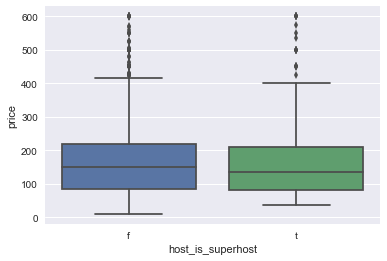

In [14]:
sns.boxplot(y='price', x='host_is_superhost', data=listings.query('price <= 600'))

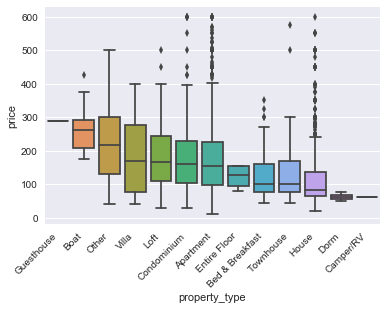

In [15]:
sort_order = listings.query('price <= 600')\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=listings.query('price <= 600'), order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

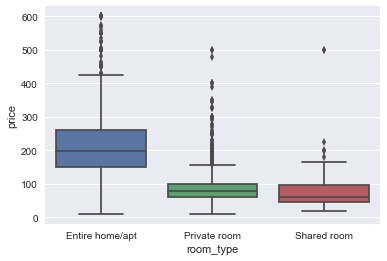

In [16]:
sort_order = listings.query('price <= 600')\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=listings.query('price <= 600'), order=sort_order)

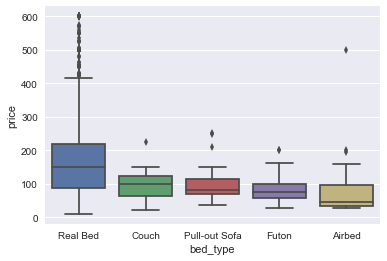

In [17]:
sort_order = listings.query('price <= 600')\
                    .groupby('bed_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='bed_type', data=listings.query('price <= 600'), order=sort_order)

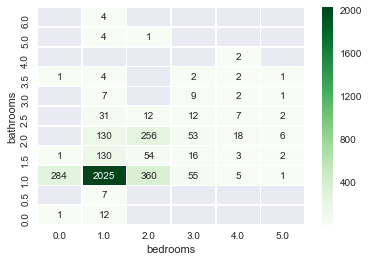

In [18]:
sns.heatmap(listings.query('price <= 600')\
                .groupby(['bathrooms', 'bedrooms'])\
                .count()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Greens", fmt='.0f', annot=True, linewidths=0.5)

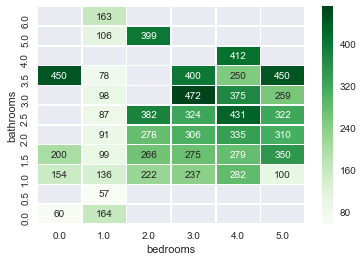

In [19]:
sns.heatmap(listings.query('price <= 600')\
                .groupby(['bathrooms', 'bedrooms'])\
                .mean()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Greens", fmt='.0f', annot=True, linewidths=0.5)

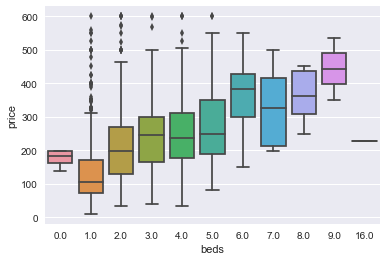

In [20]:
sns.boxplot(y='price', x='beds', data=listings.query('price <= 600'))

In [21]:
listings['amenities'] = listings['amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")])
)

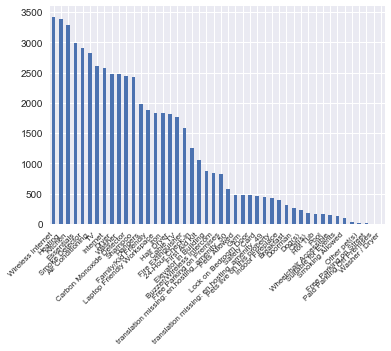

In [22]:
pd.Series(np.concatenate(listings['amenities'].map(lambda amns: amns.split("|"))))\
    .value_counts()\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.show()

In [23]:
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split("|"))))
amenity_prices = [(amn, listings[listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])

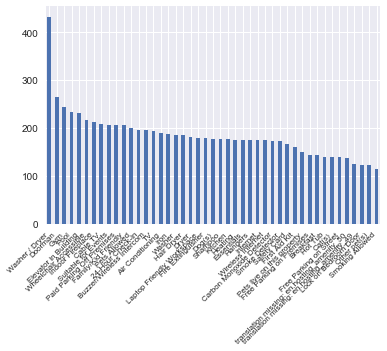

In [24]:
amenity_srs.sort_values(ascending=False).plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.show()

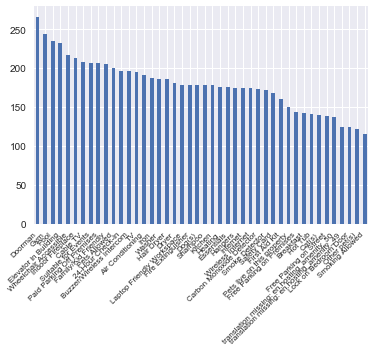

In [25]:
amenity_srs.sort_values(ascending=False)[1:].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.show()